# Predicting Heartbeat Anomalies: A Comparative Study of Neural Networks

## Evaluating Multiclass Classification Models for Heartbeat Measurements

In this project, we will focus on healthcare. This data set is made available by MIT. It contains data about 9,026 heartbeat measurements. Each row represents a single measurement (captured on a timeline). There are a total of 80 data points (columns). This is a multiclass classification task: predict whether the measurement represents a normal heartbeat or other anomalies. 

## Description of Variables

You will use the **hearbeat_cleaned.csv** data set for this assignment. Each row represents a single measurement. Columns labeled as T1 from T80 are the time steps on the timeline (there are 80 time steps, each time step has only one measurement). 

The last column is the target variable. It shows the label (category) of the measurement as follows:<br>
0 = Normal<br>
1 = Supraventricular premature beat<br>
2 = Premature ventricular contraction<br>
3 = Fusion of ventricular and normal beat<br>
4 = Unclassifiable beat

## Goal

Use the data set **hearbeat_cleaned.csv** to predict the column called **Target**. The input variables are columns labeled as **T1 to T80**. 

# 1) Read and Prepare the Data (1 points)

In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error


# Common imports
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

2023-02-15 11:37:29.911688: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
heartbeat_cleaned = pd.read_csv('heartbeat_cleaned.csv')

heartbeat_cleaned

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,...,T72,T73,T74,T75,T76,T77,T78,T79,T80,Target
0,0.987,0.892,0.461,0.1130,0.1490,0.1900,0.1650,0.1620,0.1470,0.1380,...,0.1970,0.1970,0.1960,0.2030,0.201,0.1990,0.2010,0.205,0.2080,0
1,1.000,0.918,0.621,0.1330,0.1050,0.1250,0.1170,0.0898,0.0703,0.0781,...,0.1950,0.1910,0.1520,0.1720,0.207,0.2110,0.2070,0.207,0.1720,0
2,1.000,0.751,0.143,0.1040,0.0961,0.0519,0.0442,0.0416,0.0364,0.0857,...,0.2260,0.2420,0.2440,0.2860,0.468,0.8160,0.9770,0.452,0.0519,0
3,1.000,0.740,0.235,0.0464,0.0722,0.0567,0.0103,0.0155,0.0284,0.0155,...,0.0851,0.0747,0.0515,0.0593,0.067,0.0361,0.1210,0.451,0.8690,0
4,1.000,0.833,0.309,0.0191,0.1010,0.1200,0.1040,0.0874,0.0765,0.0765,...,0.2050,0.4210,0.8030,0.9510,0.467,0.0000,0.0519,0.082,0.0628,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7955,0.929,0.871,0.805,0.7430,0.6510,0.5360,0.3940,0.2510,0.1400,0.1020,...,0.4670,0.4670,0.4690,0.4700,0.469,0.4680,0.4680,0.463,0.4710,4
7956,0.803,0.692,0.587,0.4470,0.3180,0.1900,0.1180,0.0777,0.1120,0.1520,...,0.5620,0.5670,0.5610,0.5700,0.561,0.5650,0.5620,0.570,0.5610,4
7957,1.000,0.967,0.620,0.3470,0.1390,0.0890,0.1040,0.1010,0.1070,0.1010,...,0.1390,0.1510,0.1360,0.1510,0.139,0.1510,0.1420,0.169,0.1630,4
7958,0.984,0.567,0.607,0.5830,0.6070,0.5750,0.5750,0.4880,0.3930,0.2380,...,0.2220,0.2260,0.2260,0.2500,0.230,0.2420,0.2180,0.238,0.2180,4


### Inspecting the target variable:

In [4]:
heartbeat_cleaned['Target'].value_counts()

0    4633
4    1584
2    1237
1     445
3      61
Name: Target, dtype: int64

<AxesSubplot: >

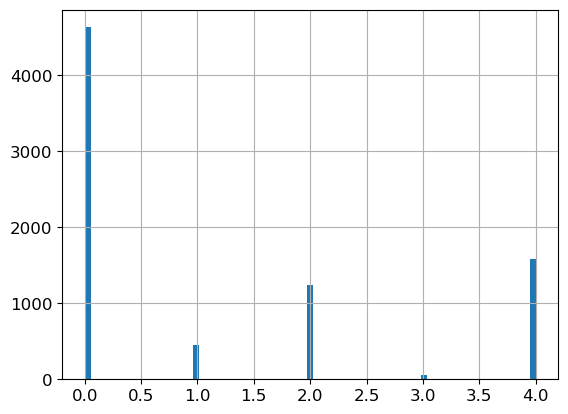

In [5]:
heartbeat_cleaned['Target'].hist(bins=75)

The target variable has more Normal (o) observations than any other type of heartbeat. The second is Unclassifiable beat and the thirt one is Premature ventricular contraction

### Separating the target variable

In [6]:
y = heartbeat_cleaned['Target']
x = heartbeat_cleaned.drop('Target', axis=1)

In [7]:
y.shape, x.shape

((7960,), (7960, 80))

### Split the data

In [8]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3)

In [9]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((5572, 80), (5572,), (2388, 80), (2388,))

## 1.2 Data Transformation

In [10]:
#Target variables need to be an array with integer type
train_y = np.array(train_y)
test_y = np.array(test_y)

train_y = train_y.astype(np.int32)
test_y = test_y.astype(np.int32)

In [11]:
train_y.shape, test_y.shape

((5572,), (2388,))

In [12]:
#Check the first 10 values of the train_y data set
train_y[0:10]

array([1, 0, 2, 0, 2, 2, 0, 0, 4, 4], dtype=int32)

In [13]:
#Convert input variables to a 2-D array with float data type
train_x= np.array(train_x)
test_x= np.array(test_x)

train_x = train_x.astype(np.float32)
test_x = test_x.astype(np.float32)

In [14]:
#Keras expects a different input format:
#Data needs to have 3 dimensions

train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1], 1))
test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1], 1))

In [15]:
train_x.shape, test_x.shape

((5572, 80, 1), (2388, 80, 1))

# 2) Find the baseline (0.5 point)

In [16]:
heartbeat_cleaned['Target'].value_counts()/len(heartbeat_cleaned)

0    0.582035
4    0.198995
2    0.155402
1    0.055905
3    0.007663
Name: Target, dtype: float64

In [17]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")

dummy_clf.fit(train_x, train_y)

DummyClassifier(strategy='most_frequent')

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
#Baseline Train Accuracy
dummy_train_pred = dummy_clf.predict(train_x)

baseline_train_acc = accuracy_score(train_y, dummy_train_pred)

print('Baseline Train Accuracy: {}' .format(baseline_train_acc))

Baseline Train Accuracy: 0.5773510409188801


In [20]:
#Baseline Test Accuracy
dummy_test_pred = dummy_clf.predict(test_x)

baseline_test_acc = accuracy_score(test_y, dummy_test_pred)

print('Baseline Test Accuracy: {}' .format(baseline_test_acc))

Baseline Test Accuracy: 0.592964824120603


# 3) Model Building

# 3.1 Build a cross-sectional (i.e., a regular) Neural Network model using Keras (with only one hidden layer) (2 points)

In [21]:
model_1 = keras.models.Sequential([
    
    keras.layers.Flatten(input_shape=[80, 1]),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
    
])

2023-02-15 11:40:37.719217: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
np.random.seed(42)
tf.random.set_seed(42)

optimizer = tf.keras.optimizers.Nadam(learning_rate=0.02)

# If multiclass, use "sparse_categorical_crossentropy" as the loss function
model_1.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])

history = model_1.fit(train_x, train_y, epochs=40,
                    validation_data=(test_x, test_y))

Epoch 1/40
175/175 [==============================] - 2s 4ms/step - loss: 0.7216 - accuracy: 0.7561 - val_loss: 0.6090 - val_accuracy: 0.7952
Epoch 2/40
175/175 [==============================] - 0s 2ms/step - loss: 0.5098 - accuracy: 0.8274 - val_loss: 0.6128 - val_accuracy: 0.7642
Epoch 3/40
175/175 [==============================] - 1s 3ms/step - loss: 0.4517 - accuracy: 0.8541 - val_loss: 0.8275 - val_accuracy: 0.6646
Epoch 4/40
175/175 [==============================] - 0s 2ms/step - loss: 0.4199 - accuracy: 0.8667 - val_loss: 0.5653 - val_accuracy: 0.7965
Epoch 5/40
175/175 [==============================] - 0s 2ms/step - loss: 0.3947 - accuracy: 0.8787 - val_loss: 0.3596 - val_accuracy: 0.8974
Epoch 6/40
175/175 [==============================] - 0s 2ms/step - loss: 0.3799 - accuracy: 0.8885 - val_loss: 0.5811 - val_accuracy: 0.8271
Epoch 7/40
175/175 [==============================] - 0s 2ms/step - loss: 0.3723 - accuracy: 0.8857 - val_loss: 0.6151 - val_accuracy: 0.8011
Epoch 

In [23]:
# evaluate the model

scores_model_1 = model_1.evaluate(test_x, test_y, verbose=0)

scores_model_1

# In results, first is loss, second is accuracy

[0.5685343742370605, 0.8262144327163696]

In [24]:
# extract the accuracy from model.evaluate

print("%s: %.2f" % (model_1.metrics_names[0], scores_model_1[0]))
print("%s: %.2f%%" % (model_1.metrics_names[1], scores_model_1[1]*100))

loss: 0.57
accuracy: 82.62%


### Crossvalidation on model 1: Neural Network

In [25]:
from sklearn.model_selection import StratifiedKFold

In [26]:
# Load dataset
data = pd.read_csv('heartbeat_cleaned.csv')
X = data.drop('Target', axis=1).values
y = data['Target'].values

In [32]:
# Define model architecture
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(80, activation='relu', input_dim=X.shape[1]),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax')
])

optimizer = tf.keras.optimizers.Nadam(learning_rate=0.02)

# Define training parameters
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define cross-validation strategy
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [33]:
cross_val_acc_model1 = []
# Perform cross-validation
for train_idx, test_idx in kfold.split(X, y):
  # Split data into training and testing sets
  X_train, X_test = X[train_idx], X[test_idx]
  y_train, y_test = y[train_idx], y[test_idx]

  # One-hot encode class labels
  y_train = tf.keras.utils.to_categorical(y_train, num_classes=5)
  y_test = tf.keras.utils.to_categorical(y_test, num_classes=5)

  # Train model on training set
  model.fit(X_train, y_train, epochs=40, batch_size=32, verbose=0)

  # Evaluate model on testing set
  loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
  cross_val_acc_model1.append(accuracy)
  print(f'Test loss: {loss:.4f}, test accuracy: {accuracy:.4f}')

Test loss: 0.2098, test accuracy: 0.9378
Test loss: 0.2589, test accuracy: 0.9315
Test loss: 0.2311, test accuracy: 0.9290
Test loss: 0.2237, test accuracy: 0.9384
Test loss: 0.1591, test accuracy: 0.9529


In [34]:
cross_val_acc_model1 = np.average(np.array(cross_val_acc_model1))
cross_val_acc_model1

0.9379397034645081

# 3.2 Build a deep cross-sectional (i.e., regular) Neural Network model using Keras (with two or more hidden layers) (2 points)

In [30]:
model_2 = keras.models.Sequential([
    
    keras.layers.Flatten(input_shape=[80, 1]),
    keras.layers.Dense(40, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
    
])

In [31]:
np.random.seed(42)
tf.random.set_seed(42)

optimizer = tf.keras.optimizers.Nadam(learning_rate=0.02)

# If multiclass, use "sparse_categorical_crossentropy" as the loss function
model_2.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])


history = model_2.fit(train_x, train_y, epochs=40,
                    validation_data=(test_x, test_y))

Epoch 1/40
175/175 [==============================] - 2s 4ms/step - loss: 0.7434 - accuracy: 0.7430 - val_loss: 0.6560 - val_accuracy: 0.7605
Epoch 2/40
175/175 [==============================] - 0s 3ms/step - loss: 0.5998 - accuracy: 0.8116 - val_loss: 0.9980 - val_accuracy: 0.6181
Epoch 3/40
175/175 [==============================] - 0s 3ms/step - loss: 0.4687 - accuracy: 0.8415 - val_loss: 0.8003 - val_accuracy: 0.7839
Epoch 4/40
175/175 [==============================] - 0s 2ms/step - loss: 0.4209 - accuracy: 0.8693 - val_loss: 0.4047 - val_accuracy: 0.8777
Epoch 5/40
175/175 [==============================] - 0s 3ms/step - loss: 0.3689 - accuracy: 0.8855 - val_loss: 0.3511 - val_accuracy: 0.8982
Epoch 6/40
175/175 [==============================] - 1s 3ms/step - loss: 0.3446 - accuracy: 0.8982 - val_loss: 0.8824 - val_accuracy: 0.7621
Epoch 7/40
175/175 [==============================] - 0s 3ms/step - loss: 0.4027 - accuracy: 0.8692 - val_loss: 0.4579 - val_accuracy: 0.8358
Epoch 

In [35]:
# evaluate the model

scores_model_2 = model_2.evaluate(test_x, test_y, verbose=0)

scores_model_2

# In results, first is loss, second is accuracy

[0.25734856724739075, 0.9216917753219604]

In [36]:
# extract the accuracy from model.evaluate

print("%s: %.2f" % (model_2.metrics_names[0], scores_model_2[0]))
print("%s: %.2f%%" % (model_2.metrics_names[1], scores_model_2[1]*100))

loss: 0.26
accuracy: 92.17%


### Crossvalidation on model 2: Deep Neural Network

In [37]:
# Define model architecture
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(80, activation='relu', input_dim=X.shape[1]),
  tf.keras.layers.Dense(40, activation='relu'),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax')
])

optimizer = tf.keras.optimizers.Nadam(learning_rate=0.02)

# Define training parameters
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define cross-validation strategy
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [38]:
cross_val_acc_model2 = []
# Perform cross-validation
for train_idx, test_idx in kfold.split(X, y):
  # Split data into training and testing sets
  X_train, X_test = X[train_idx], X[test_idx]
  y_train, y_test = y[train_idx], y[test_idx]

  # One-hot encode class labels
  y_train = tf.keras.utils.to_categorical(y_train, num_classes=5)
  y_test = tf.keras.utils.to_categorical(y_test, num_classes=5)

  # Train model on training set
  model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

  # Evaluate model on testing set
  loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
  cross_val_acc_model2.append(accuracy)
  print(f'Test loss: {loss:.4f}, test accuracy: {accuracy:.4f}')

Test loss: 0.3199, test accuracy: 0.9039
Test loss: 0.3179, test accuracy: 0.9121
Test loss: 0.2708, test accuracy: 0.9334
Test loss: 0.2681, test accuracy: 0.9259
Test loss: 0.2540, test accuracy: 0.9322


In [39]:
cross_val_acc_model2 = np.average(np.array(cross_val_acc_model2))
cross_val_acc_model2

0.9214824199676513

# 3.3 Build a LSTM Model (with only one layer) (2 points)

In [40]:
n_steps = 80
n_inputs = 1

model_3 = keras.models.Sequential([
    
    keras.layers.LSTM(40, input_shape=[n_steps, n_inputs]),
    keras.layers.Dense(5, activation='softmax')
])

In [41]:
from tensorflow.keras.callbacks import EarlyStopping


earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

callback = [earlystop]

In [42]:
np.random.seed(42)
tf.random.set_seed(42)

optimizer = keras.optimizers.Nadam(learning_rate=0.02)
# If multiclass, use "sparse_categorical_crossentropy" as the loss function. If binary, use: binary_crossentropy
model_3.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])

history = model_3.fit(train_x, train_y, epochs=20,
                   validation_data = (test_x, test_y), callbacks=callback)

Epoch 1/20
175/175 [==============================] - 10s 43ms/step - loss: 1.1183 - accuracy: 0.5738 - val_loss: 1.0421 - val_accuracy: 0.6126
Epoch 2/20
175/175 [==============================] - 7s 40ms/step - loss: 1.0494 - accuracy: 0.5969 - val_loss: 1.0232 - val_accuracy: 0.6173
Epoch 3/20
175/175 [==============================] - 7s 41ms/step - loss: 1.0128 - accuracy: 0.6251 - val_loss: 0.9954 - val_accuracy: 0.6621
Epoch 4/20
175/175 [==============================] - 7s 39ms/step - loss: 0.9313 - accuracy: 0.6622 - val_loss: 0.7742 - val_accuracy: 0.7446
Epoch 5/20
175/175 [==============================] - 7s 40ms/step - loss: 0.9470 - accuracy: 0.6543 - val_loss: 0.7381 - val_accuracy: 0.7412
Epoch 6/20
175/175 [==============================] - 7s 40ms/step - loss: 0.7130 - accuracy: 0.7423 - val_loss: 0.6731 - val_accuracy: 0.8044
Epoch 7/20
175/175 [==============================] - 7s 40ms/step - loss: 0.6109 - accuracy: 0.7949 - val_loss: 0.5869 - val_accuracy: 0.797

In [43]:
# evaluate the model

scores_model_3 = model_3.evaluate(test_x, test_y, verbose=0)

scores_model_3

# In results, first is loss, second is accuracy

[0.5226406455039978, 0.839195966720581]

In [44]:
# extract the accuracy from model.evaluate

print("%s: %.2f" % (model_3.metrics_names[0], scores_model_3[0]))
print("%s: %.2f%%" % (model_3.metrics_names[1], scores_model_3[1]*100))

loss: 0.52
accuracy: 83.92%


### Crossvalidation on model 3: LSTM with one layer

In [45]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import LSTM, Dense

In [46]:
# Define model architecture
model = tf.keras.models.Sequential([
  LSTM(80, input_shape=(X.shape[1], 1)),
  Dense(40, activation='relu'),
  Dense(5, activation='softmax')
])

optimizer = tf.keras.optimizers.Nadam(learning_rate=0.02)

# Define training parameters
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define cross-validation strategy
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [47]:
cross_val_acc_model3 = []
# Perform cross-validation
for train_idx, test_idx in kfold.split(X, y):
  # Split data into training and testing sets
  X_train, X_test = X[train_idx], X[test_idx]
  y_train, y_test = y[train_idx], y[test_idx]

  # Reshape data for LSTM
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

  # One-hot encode class labels
  y_train = tf.keras.utils.to_categorical(y_train, num_classes=5)
  y_test = tf.keras.utils.to_categorical(y_test, num_classes=5)

  # Train model on training set
  model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

  # Evaluate model on testing set
  loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
  cross_val_acc_model3.append(accuracy)
  print(f'Test loss: {loss:.4f}, test accuracy: {accuracy:.4f}')

Epoch 1/10
199/199 [==============================] - 10s 38ms/step - loss: 1.1178 - accuracy: 0.5755
Epoch 2/10
199/199 [==============================] - 7s 36ms/step - loss: 1.1302 - accuracy: 0.5813
Epoch 3/10
199/199 [==============================] - 7s 36ms/step - loss: 1.1105 - accuracy: 0.5906
Epoch 4/10
199/199 [==============================] - 7s 37ms/step - loss: 1.0813 - accuracy: 0.5967
Epoch 5/10
199/199 [==============================] - 8s 39ms/step - loss: 1.0768 - accuracy: 0.5969
Epoch 6/10
199/199 [==============================] - 8s 40ms/step - loss: 1.0757 - accuracy: 0.5988
Epoch 7/10
199/199 [==============================] - 8s 38ms/step - loss: 1.0750 - accuracy: 0.5975
Epoch 8/10
199/199 [==============================] - 8s 39ms/step - loss: 1.0754 - accuracy: 0.5970
Epoch 9/10
199/199 [==============================] - 8s 39ms/step - loss: 1.0757 - accuracy: 0.5975
Epoch 10/10
199/199 [==============================] - 8s 39ms/step - loss: 1.0757 - accur

In [48]:
cross_val_acc_model3 = np.average(np.array(cross_val_acc_model3))
cross_val_acc_model3

0.5883165836334229

# 3.4 Build a deep LSTM Model (with only two layers) (2 points)

In [53]:
n_steps = 80
n_inputs = 1

model_4 = keras.models.Sequential([
    keras.layers.LSTM(40, return_sequences=True, input_shape=[n_steps, n_inputs]),
    keras.layers.LSTM(10),
    keras.layers.Dense(5, activation='softmax')
])

In [54]:
np.random.seed(42)
tf.random.set_seed(42)

optimizer = keras.optimizers.Nadam(learning_rate=0.02)

model_4.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])

history = model_4.fit(train_x, train_y, epochs=20,
                   validation_data = (test_x, test_y), callbacks=callback)

Epoch 1/20
175/175 [==============================] - 19s 85ms/step - loss: 1.1467 - accuracy: 0.5723 - val_loss: 1.0985 - val_accuracy: 0.5930
Epoch 2/20
175/175 [==============================] - 13s 76ms/step - loss: 1.1309 - accuracy: 0.5756 - val_loss: 1.1272 - val_accuracy: 0.5930
Epoch 3/20
175/175 [==============================] - 13s 73ms/step - loss: 1.1252 - accuracy: 0.5768 - val_loss: 1.1167 - val_accuracy: 0.5930
Epoch 4/20
175/175 [==============================] - 11s 64ms/step - loss: 1.1263 - accuracy: 0.5777 - val_loss: 1.1137 - val_accuracy: 0.5934
Epoch 5/20
175/175 [==============================] - 13s 73ms/step - loss: 1.1367 - accuracy: 0.5774 - val_loss: 1.1444 - val_accuracy: 0.5930
Epoch 6/20
175/175 [==============================] - 12s 67ms/step - loss: 1.1364 - accuracy: 0.5774 - val_loss: 1.1100 - val_accuracy: 0.5930
Epoch 6: early stopping


In [55]:
# evaluate the model

scores_model_4 = model_4.evaluate(test_x, test_y, verbose=0)

scores_model_4

# In results, first is loss, second is accuracy

[1.1099871397018433, 0.5929648280143738]

In [56]:
# extract the accuracy from model.evaluate

print("%s: %.2f" % (model_4.metrics_names[0], scores_model_4[0]))
print("%s: %.2f%%" % (model_4.metrics_names[1], scores_model_4[1]*100))

loss: 1.11
accuracy: 59.30%


### Crossvalidation on model 4: LSTM with two layer

In [57]:
# Define model architecture
model = tf.keras.models.Sequential([
  LSTM(80, input_shape=(X.shape[1], 1)),
  Dense(40, activation='relu'),
  Dense(10, activation='relu'),
  Dense(5, activation='softmax')
])

optimizer = tf.keras.optimizers.Nadam(learning_rate=0.02)

# Define training parameters
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define cross-validation strategy
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [58]:
cross_val_acc_model4 = []
# Perform cross-validation
for train_idx, test_idx in kfold.split(X, y):
  # Split data into training and testing sets
  X_train, X_test = X[train_idx], X[test_idx]
  y_train, y_test = y[train_idx], y[test_idx]

  # Reshape data for LSTM
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

  # One-hot encode class labels
  y_train = tf.keras.utils.to_categorical(y_train, num_classes=5)
  y_test = tf.keras.utils.to_categorical(y_test, num_classes=5)

  # Train model on training set
  model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

  # Evaluate model on testing set
  loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
  cross_val_acc_model4.append(accuracy)
  print(f'Test loss: {loss:.4f}, test accuracy: {accuracy:.4f}')

Epoch 1/10
199/199 [==============================] - 10s 38ms/step - loss: 1.1196 - accuracy: 0.5721
Epoch 2/10
199/199 [==============================] - 7s 36ms/step - loss: 1.0162 - accuracy: 0.6104
Epoch 3/10
199/199 [==============================] - 7s 34ms/step - loss: 1.0818 - accuracy: 0.6091
Epoch 4/10
199/199 [==============================] - 7s 33ms/step - loss: 1.0431 - accuracy: 0.6090
Epoch 5/10
199/199 [==============================] - 8s 39ms/step - loss: 1.0536 - accuracy: 0.5991
Epoch 6/10
199/199 [==============================] - 8s 40ms/step - loss: 1.0602 - accuracy: 0.5818
Epoch 7/10
199/199 [==============================] - 6s 30ms/step - loss: 1.0363 - accuracy: 0.6014
Epoch 8/10
199/199 [==============================] - 7s 34ms/step - loss: 1.0112 - accuracy: 0.6187
Epoch 9/10
199/199 [==============================] - 8s 40ms/step - loss: 1.0029 - accuracy: 0.6244
Epoch 10/10
199/199 [==============================] - 7s 35ms/step - loss: 0.9863 - accur

In [59]:
cross_val_acc_model4 = np.average(np.array(cross_val_acc_model4))
cross_val_acc_model4

0.690703523159027

# 3.5 Build a GRU Model (with only one layer) (2 points)

In [60]:
n_steps = 80
n_inputs = 1

model_5 = keras.models.Sequential([
    keras.layers.GRU(40, input_shape=[n_steps, n_inputs]),
    keras.layers.Dense(5, activation='softmax')
])

In [61]:
np.random.seed(42)
tf.random.set_seed(42)

optimizer = keras.optimizers.Nadam(learning_rate=0.02)

model_5.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])

history = model_5.fit(train_x, train_y, epochs=20,
                   validation_data = (test_x, test_y), callbacks=callback)

Epoch 1/20
175/175 [==============================] - 11s 49ms/step - loss: 1.0623 - accuracy: 0.5942 - val_loss: 0.8903 - val_accuracy: 0.6834
Epoch 2/20
175/175 [==============================] - 8s 45ms/step - loss: 0.9481 - accuracy: 0.6499 - val_loss: 0.8764 - val_accuracy: 0.7060
Epoch 3/20
175/175 [==============================] - 7s 40ms/step - loss: 0.7975 - accuracy: 0.7346 - val_loss: 0.7803 - val_accuracy: 0.7316
Epoch 4/20
175/175 [==============================] - 7s 38ms/step - loss: 0.7249 - accuracy: 0.7656 - val_loss: 0.7114 - val_accuracy: 0.7751
Epoch 5/20
175/175 [==============================] - 6s 37ms/step - loss: 0.6802 - accuracy: 0.7660 - val_loss: 0.6646 - val_accuracy: 0.7651
Epoch 6/20
175/175 [==============================] - 7s 38ms/step - loss: 0.6223 - accuracy: 0.7859 - val_loss: 0.6169 - val_accuracy: 0.7730
Epoch 7/20
175/175 [==============================] - 7s 38ms/step - loss: 0.5924 - accuracy: 0.7959 - val_loss: 0.6081 - val_accuracy: 0.786

In [62]:
# evaluate the model

scores_model_5 = model_5.evaluate(test_x, test_y, verbose=0)

scores_model_5

# In results, first is loss, second is accuracy

[0.40862205624580383, 0.8802344799041748]

In [63]:
# extract the accuracy from model.evaluate

print("%s: %.2f" % (model_5.metrics_names[0], scores_model_5[0]))
print("%s: %.2f%%" % (model_5.metrics_names[1], scores_model_5[1]*100))

loss: 0.41
accuracy: 88.02%


### Crossvalidation on model 5: GRU with one layer

In [64]:
from tensorflow.keras.layers import GRU, Dense

In [65]:
# Define model architecture
model = tf.keras.models.Sequential([
  GRU(80, input_shape=(X.shape[1], 1)),
  Dense(40, activation='relu'),
  Dense(5, activation='softmax')
])

optimizer = tf.keras.optimizers.Nadam(learning_rate=0.02)

# Define training parameters
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define cross-validation strategy
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [66]:
cross_val_acc_model5 = []
# Perform cross-validation
for train_idx, test_idx in kfold.split(X, y):
  # Split data into training and testing sets
  X_train, X_test = X[train_idx], X[test_idx]
  y_train, y_test = y[train_idx], y[test_idx]

  # Reshape data for GRU
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

  # One-hot encode class labels
  y_train = tf.keras.utils.to_categorical(y_train, num_classes=5)
  y_test = tf.keras.utils.to_categorical(y_test, num_classes=5)

  # Train model on training set
  model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

  # Evaluate model on testing set
  loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
  cross_val_acc_model5.append(accuracy)
  print(f'Test loss: {loss:.4f}, test accuracy: {accuracy:.4f}')

Epoch 1/10
199/199 [==============================] - 11s 43ms/step - loss: 1.0572 - accuracy: 0.6041
Epoch 2/10
199/199 [==============================] - 7s 36ms/step - loss: 0.6640 - accuracy: 0.7681
Epoch 3/10
199/199 [==============================] - 7s 37ms/step - loss: 0.4997 - accuracy: 0.8317
Epoch 4/10
199/199 [==============================] - 8s 38ms/step - loss: 0.3742 - accuracy: 0.8821
Epoch 5/10
199/199 [==============================] - 8s 40ms/step - loss: 0.3341 - accuracy: 0.8960
Epoch 6/10
199/199 [==============================] - 8s 42ms/step - loss: 0.3164 - accuracy: 0.9000
Epoch 7/10
199/199 [==============================] - 7s 35ms/step - loss: 0.3539 - accuracy: 0.8948
Epoch 8/10
199/199 [==============================] - 7s 34ms/step - loss: 1.0523 - accuracy: 0.5898
Epoch 9/10
199/199 [==============================] - 7s 33ms/step - loss: 0.7866 - accuracy: 0.7134
Epoch 10/10
199/199 [==============================] - 6s 29ms/step - loss: 0.6931 - accur

In [67]:
cross_val_acc_model5 = np.average(np.array(cross_val_acc_model5))
cross_val_acc_model5

0.8550251245498657

# 3.6 Build a deep GRU Model (with only two layers) (2 points)

In [68]:
n_steps = 80
n_inputs = 1

model_6 = keras.models.Sequential([
    keras.layers.GRU(20, return_sequences=True, input_shape=[n_steps, n_inputs]),
    keras.layers.GRU(10),
    keras.layers.Dense(5, activation='softmax')
])

In [69]:
np.random.seed(42)
tf.random.set_seed(42)

optimizer = keras.optimizers.Nadam(learning_rate=0.02)

model_6.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])

history = model_6.fit(train_x, train_y, epochs=20,
                   validation_data = (test_x, test_y), callbacks=callback)

Epoch 1/20
175/175 [==============================] - 19s 81ms/step - loss: 1.0638 - accuracy: 0.5899 - val_loss: 1.1065 - val_accuracy: 0.5930
Epoch 2/20
175/175 [==============================] - 11s 65ms/step - loss: 1.0261 - accuracy: 0.6193 - val_loss: 0.8875 - val_accuracy: 0.6407
Epoch 3/20
175/175 [==============================] - 11s 63ms/step - loss: 0.6329 - accuracy: 0.7976 - val_loss: 0.9303 - val_accuracy: 0.6294
Epoch 4/20
175/175 [==============================] - 11s 63ms/step - loss: 0.5056 - accuracy: 0.8417 - val_loss: 0.4638 - val_accuracy: 0.8551
Epoch 5/20
175/175 [==============================] - 11s 62ms/step - loss: 0.4435 - accuracy: 0.8613 - val_loss: 0.3984 - val_accuracy: 0.8681
Epoch 6/20
175/175 [==============================] - 11s 62ms/step - loss: 0.4075 - accuracy: 0.8760 - val_loss: 0.5665 - val_accuracy: 0.8065
Epoch 7/20
175/175 [==============================] - 11s 61ms/step - loss: 0.3899 - accuracy: 0.8846 - val_loss: 0.4179 - val_accuracy:

In [70]:
# evaluate the model

scores_model_6 = model_6.evaluate(test_x, test_y, verbose=0)

scores_model_6

# In results, first is loss, second is accuracy

[0.6930766701698303, 0.7068676948547363]

In [71]:
# extract the accuracy from model.evaluate

print("%s: %.2f" % (model_6.metrics_names[0], scores_model_6[0]))
print("%s: %.2f%%" % (model_6.metrics_names[1], scores_model_6[1]*100))

loss: 0.69
accuracy: 70.69%


### Crossvalidation on model 6: GRU with two layers

In [72]:
# Define model architecture
model = tf.keras.models.Sequential([
  GRU(80, input_shape=(X.shape[1], 1)),
  Dense(20, activation='relu'),
  Dense(10, activation='relu'),
  Dense(5, activation='softmax')
])

optimizer = tf.keras.optimizers.Nadam(learning_rate=0.02)

# Define training parameters
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define cross-validation strategy
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [73]:
cross_val_acc_model6 = []
# Perform cross-validation
for train_idx, test_idx in kfold.split(X, y):
  # Split data into training and testing sets
  X_train, X_test = X[train_idx], X[test_idx]
  y_train, y_test = y[train_idx], y[test_idx]

  # Reshape data for GRU
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

  # One-hot encode class labels
  y_train = tf.keras.utils.to_categorical(y_train, num_classes=5)
  y_test = tf.keras.utils.to_categorical(y_test, num_classes=5)

  # Train model on training set
  model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

  # Evaluate model on testing set
  loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
  cross_val_acc_model6.append(accuracy)
  print(f'Test loss: {loss:.4f}, test accuracy: {accuracy:.4f}')

Epoch 1/10
199/199 [==============================] - 8s 28ms/step - loss: 0.9887 - accuracy: 0.6401
Epoch 2/10
199/199 [==============================] - 5s 26ms/step - loss: 0.6311 - accuracy: 0.7872
Epoch 3/10
199/199 [==============================] - 5s 25ms/step - loss: 0.5324 - accuracy: 0.8219
Epoch 4/10
199/199 [==============================] - 5s 26ms/step - loss: 0.5165 - accuracy: 0.8247
Epoch 5/10
199/199 [==============================] - 5s 26ms/step - loss: 0.4757 - accuracy: 0.8459
Epoch 6/10
199/199 [==============================] - 5s 27ms/step - loss: 0.4400 - accuracy: 0.8574
Epoch 7/10
199/199 [==============================] - 5s 26ms/step - loss: 0.4264 - accuracy: 0.8664
Epoch 8/10
199/199 [==============================] - 5s 27ms/step - loss: 0.4096 - accuracy: 0.8697
Epoch 9/10
199/199 [==============================] - 5s 25ms/step - loss: 0.4450 - accuracy: 0.8618
Epoch 10/10
199/199 [==============================] - 5s 26ms/step - loss: 0.4352 - accura

In [74]:
cross_val_acc_model6 = np.average(np.array(cross_val_acc_model6))
cross_val_acc_model6

0.8479899406433106

# 4) Discussion

## 4.1 List the test values of each model you built (0.5 points)

In [75]:
model_names = ['NN 1 layer', 'Deep NN', 'LSTM 1 layer', 'LSTM 2 layers', 'GRU 1 layer', 'GRU 2 layers']
acc_model_scores = [scores_model_1[1]*100, scores_model_2[1]*100, scores_model_3[1]*100, scores_model_4[1]*100, scores_model_5[1]*100, scores_model_6[1]*100]
loss_model_scores = [scores_model_1[0], scores_model_2[0], scores_model_3[0], scores_model_4[0], scores_model_5[0], scores_model_6[0]]

In [76]:
acc_model_scores

[82.62144327163696,
 92.16917753219604,
 83.9195966720581,
 59.29648280143738,
 88.02344799041748,
 70.68676948547363]

In [77]:
loss_model_scores

[0.5685343742370605,
 0.25734856724739075,
 0.5226406455039978,
 1.1099871397018433,
 0.40862205624580383,
 0.6930766701698303]

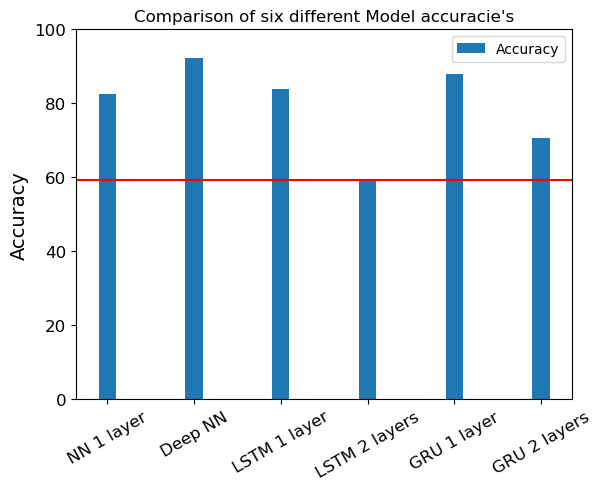

In [78]:

#Create the bar chart
fig, ax = plt.subplots()
bar_width = 0.2
bar1 = ax.bar(model_names, acc_model_scores, bar_width, label='Accuracy')
#bar2 = ax.bar(model_names, loss_model_scores, bar_width, label='loss')
#plt.xticks(model_names, model_names, rotation=45)

#Add labels and title
plt.title("Comparison of six different Model accuracie's")
ax.set_ylabel('Accuracy')
plt.ylim(0, 100)
ax.legend()

#Define the Baseline test accuracy as reference
ax.axhline(y = baseline_test_acc*100, color = 'r', linestyle = '-')

#Make the X axis more readable
plt.xticks(model_names, model_names, rotation=30)

#Show the chart
plt.show()

I decided to do not to plot the loss metric since it's inversely proportional to the accuracy and it would be confusing to see because of the scale.

### After Cross-validation

In [79]:
acc_model_cross_val = [cross_val_acc_model1*100, cross_val_acc_model2*100, cross_val_acc_model3*100, cross_val_acc_model4*100, cross_val_acc_model5*100, cross_val_acc_model6*100]
acc_model_cross_val

[93.7939703464508,
 92.14824199676514,
 58.831658363342285,
 69.07035231590271,
 85.50251245498657,
 84.79899406433105]

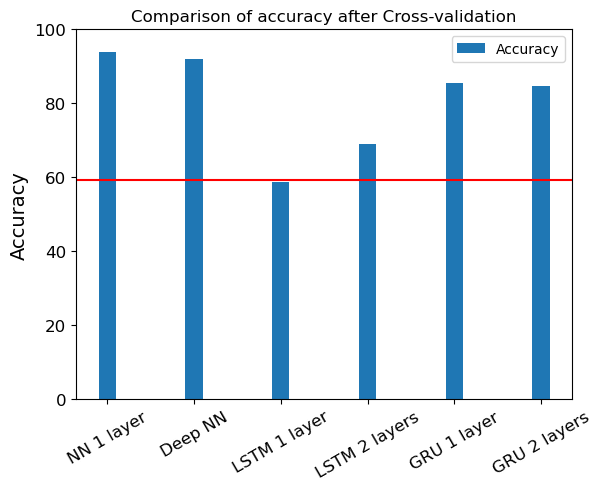

In [80]:

#Create the bar chart
fig, ax = plt.subplots()
bar_width = 0.2
bar1 = ax.bar(model_names, acc_model_cross_val, bar_width, label='Accuracy')
#bar2 = ax.bar(model_names, loss_model_scores, bar_width, label='loss')
#plt.xticks(model_names, model_names, rotation=45)

#Add labels and title
plt.title("Comparison of accuracy after Cross-validation")
ax.set_ylabel('Accuracy')
plt.ylim(0, 100)
ax.legend()

#Define the Baseline test accuracy as reference
ax.axhline(y = baseline_test_acc*100, color = 'r', linestyle = '-')

#Make the X axis more readable
plt.xticks(model_names, model_names, rotation=30)

#Show the chart
plt.show()

## 4.2 Which model performs the best and why? (0.5 points) 

### **Among the models, the Deep Neural Network is the most accurate, with a ~93% accuracy rate, most likely because of its hyperparameter settings (Nadam optimizer and learning rate set to 0.02)**. 
### **Since the output layer has five classes and the input layer has 80 features, I decided to use a funnel architecture (40,20,10) in which 10 is the number of neurons in the last hidden layer. Even though LSTM (Long Short-Term Memory) and GRU (Gated Recurrent Unit) are specialized types of recurrent neural networks (RNNs) that can model sequential data, such as time-series data, they cannot beat the current Deep neural network.**
### **On the other hand, the "LSTM 1 layer" and "GRU 2 layer" are not far behind the DNN in accuracy, so they are still performing well with the time-series data because they can capture long-term dependencies and handle variable-length data. My conclusion is that the relative performance of these models depends on the characteristics of the dataset, the hyperparameters settings, the activation functions used, and the number of classes to predict.**

## 4.3 How does it compare to baseline? (0.5 points)

### **The majority of the models being tested perform better than the baseline (see the red line in the above picture). Only the "LSTM 1 layers" (running the model once) and the "LSTM 2 layers" (using cross-validation) fail to beat the baseline with a significant accuracy gap, and these models appear to be overfitting because the input gates are adding new memories to the long-term state and detecting too much or too little long-term or short-term dependencies.**
### **In other words, I speculate that having 2 layers means that the model learns too much from the data and cannot quickly adapt to new data coming into a time-series dataset, but this speculation needs to be tested and further analyzed. Other problems could be poor hyperparameter tuning or insufficient training data since a deeper model may require more training data to learn effective representations, especially if the task is complex or the input sequences are long, like 80 in this specific case.**